# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 2</span>

---
Lecturer: Truyen Tran | truyen.tran@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, 11th May 2018 </span>
---

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


### Submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[groupID]_assignment2_solution.ipynb**
* An exported version of your output: **[groupID]_assignment2_output.html**  
* Three json data files storing tweets collected for three keywords, named **[groupID]_w1.json**, **[groupID]_w2.json**, **[groupID]_w3.json** where **w1, w2, w3** are the three keywords you selected.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data for Australia</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** selected keyword, your tasks are:

* Crawl all tweets contain this keyword written in English and geocoded within Australia.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
'''
Import packages needed for processing
'''
import re
import json
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

'''
If you need add any additional packages, then add them below
'''
import json

**Instruction 1.1**. Enter your selected keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Enter the list of three keywords you selected to the variables keywords below
e.g. keywords = ["game","bike","fiction"]
'''

keywords = ["game","bike","fiction"] # INSERT YOUR CODE 

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 5**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Twitter API credentials 
CONSUMER_KEY =  "ihqmqR1jJQ1g0I5IKcEKrbHr1"#ENTER YOUR CONSUMER_KEY
CONSUMER_SECRET = "oBYqs6yMNlbPC7acVD80W9HQQTtw27oDa7CRzzJbI5sWMKQ77s"#ENTER YOUR CONSUMER_SECRET
OAUTH_TOKEN = "939424711028740097-KgPDxQn02juU9t9XsmdAPzzvdKVqsLL" #ENTER YOUR OAUTH_TOKEN
OAUTH_TOKEN_SECRET = "b3whAx9mywsj9FpFWMSzAT5T5o4U5YUAMSU0PNBRZRA8B"  #ENTER YOUR OAUTH_TOKEN_SECRET

# Authonticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET)
                 # INSERT YOUR CODE HERE
                 

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been given to you to perform the query in the subsequent tasks**. **Do not** modify these variables.

In [6]:
# geo coordinations of the desired place
AUS_LAT = -24.396176
AUS_LONG = 133.247614
AUS_RADIUS = 1500

**Instruction 1.3**. For each keyword, you are required to crawl at least **500** tweets using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api,'car',50,500)
```
will attempt to crawl a total of at least 500 tweets that contains the word 'car'. Within each single query, it will attempt to obtain 50 tweets. For this assignment, by default we will query within Australian region specified by the latitute, longitude and radius specified before.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 14**]

In [515]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
def retrieve_tweets(api, keyword, batch_count, total_count):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """
    
    # the collection of tweets to be returned
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request('search/tweets', {'q': keyword,
                                         'count': '100',#INSERT YOUR CODE
                                         'lang':'en',
                                         'result_type':'recent',
                                         'geocode':'{},{},{}mi'.format(AUS_LAT, AUS_LONG,AUS_RADIUS)
                                        }
                      )
    
    # store the tweets in a list
    tweets += resp.json()['statuses']
    
    # find the max_id_str for the next batch
    ids = [tweet['id'] for tweet in tweets]
    max_id_str = str(min(ids))

    # loop until as many tweets as total_count is collected
    number_of_tweets = len(tweets)
    while number_of_tweets < total_count:
        print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                        keyword, 
                                                                                        tweets[number_of_tweets-1]['created_at']))
        resp = api.request('search/tweets', {'q': keyword,
                                             'count':'100',
                                             'lang':'en',
                                             'result_type':'recent',#INSERT YOUR CODE
                                             'max_id':'id' , #INSERT YOUR CODE
                                             'geocode':'{},{},{}mi'.format(AUS_LAT, AUS_LONG,AUS_RADIUS)
                                             #INSERT YOUR CODE
                                            }
                          )

        tweets += resp.json()['statuses']
        ids = [tweet['id'] for tweet in tweets]
        max_id_str = str(min(ids))
        number_of_tweets = len(tweets)
        
    print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets-1]['created_at']))
    return tweets

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each corresponds to one keyword. And, you are required to collect at least **500** tweets for each key word.

[**Total mark: 9**]

In [516]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Your task is to write the code to perform three function calls, each corresponds to one keyword. 
And, you are required to collect at least 500 tweets for each key word.
'''

# Collecting the tweets for three assigned keywords, 
# Your function call should look like this:  retrieve_tweets(api,'keyword',single_count,total_count)

k1_tweets = retrieve_tweets(api, 'game', 50, 500)               #INSERT YOUR CODE HERE
k2_tweets = retrieve_tweets(api, 'bike', 50, 500)#INSERT YOUR CODE HERE
k3_tweets = retrieve_tweets(api, 'fiction', 50, 500)#INSERT YOUR CODE HERE

# PLEASE NOTE THAT IF YOU RUN THIS CELL, IT MIGHT TAKE A WHILE TO DOWNLOAD ALL THE TWEETS REQUIRED.
# MAKE SURE THAT YOU WAIT UNTILL THE CELL FINISHES RUNNING.

100 tweets are collected for keyword game. Last tweet created at Wed May 09 04:00:19 +0000 2018
200 tweets are collected for keyword game. Last tweet created at Wed May 09 04:00:23 +0000 2018
300 tweets are collected for keyword game. Last tweet created at Wed May 09 04:00:23 +0000 2018
400 tweets are collected for keyword game. Last tweet created at Wed May 09 04:00:23 +0000 2018
500 tweets are collected for keyword game. Last tweet created at Wed May 09 04:00:23 +0000 2018
100 tweets are collected for keyword bike. Last tweet created at Tue May 08 21:55:04 +0000 2018
200 tweets are collected for keyword bike. Last tweet created at Tue May 08 21:55:04 +0000 2018
300 tweets are collected for keyword bike. Last tweet created at Tue May 08 21:55:04 +0000 2018
400 tweets are collected for keyword bike. Last tweet created at Tue May 08 21:55:04 +0000 2018
500 tweets are collected for keyword bike. Last tweet created at Tue May 08 21:55:04 +0000 2018
100 tweets are collected for keyword fic

**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [517]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print the number of tweets have been collected for each keyword
'''
# INSERT OUR CODE HERE
print(len(k1_tweets))
print(len(k2_tweets))
print(len(k3_tweets))

500
500
500


**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

In [518]:
# Data type of tweets
print(type(k1_tweets[0]))

<class 'dict'>


**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [519]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''# INSERT YOUR CODE HERE

print(k1_tweets[0].keys())
'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
print(k1_tweets[0]['text'])# INSERT YOUR CODE HERE

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[1]))
print(k2_tweets[0]['text'])
          # INSERT YOUR CODE HERE

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
print(k3_tweets[0]['text'])# INSERT YOUR CODE HER3

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

The text of the first tweet for "game":

RT @TheoHarrison9: Oh please, now slimy shorten is hinting the High Court moved the goal posts.
Trouble is,even if they did, Ludlum startin…

The text of the first tweet for "bike":

@Cameron_Kirby plenty of share ones in Melbourne to practice on. It's like riding a bike. An acoustic motorbike.

The text of the first tweet for "fiction":

@ElliotLangerman A good point, although I found non-fiction books were slightly better than fiction as audio books.


**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [520]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 9**]

In [521]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Use the save_to_json() function defined above, for the collection of tweets 
you have crawled for each keyword, save them into a file named w.json where w is the keyword.
'''
# saving the tweets in three json files, one for each keyword
#INSERT YOUR CODE HERE
save_to_json(k1_tweets, 'game.json')
save_to_json(k2_tweets, 'bike.json')
save_to_json(k3_tweets, 'fiction.json')



###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical session 5 to 7 to construct the term-by-document matrix for the tweets and perform visualisation tasks to understand them.

**Part 2C**. Applying the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 3**]

In [522]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp:
        d = json.load(fp)
        data = d
        # INSERT THE MISSING PIECE OF CODE HERE
        return data     

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [523]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''

k1_tweets  = read_json_file('game.json')# INSERT YOUR CODE HERE
k2_tweets = read_json_file('bike.json')# INSERT YOUR CODE HERE
k3_tweets = read_json_file('fiction.json')# INSERT YOUR CODE HERE

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [524]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out the number of tweets containes in three variables: 
k1_tweets, k2_tweets and k3_tweets
'''
#INSERT YOUR CODE HERE
print(len(k1_tweets))
print(len(k2_tweets))
print(len(k3_tweets))

500
500
500


**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets having less than 50 characters are short and should be remove. 

**Instruction 2.4**. In this task, you need to filter all short tweets.

1. Write a function called `is_short_tweet` that takes a tweet as an input and return True if the text of the tweet has less than 50 characters and False otherwise. **(6 marks)**

2. Write your codes to remove all tweets that have less than 50 characters in variables ***k1_tweets***, ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***, respectively. **(6 marks)**

[**Total mark: 12**]

In [525]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def is_short_tweet(tweet):
    if len(tweet['text'])<50:
        return True
    else: 
        return False
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    # INSERT YOUR CODE HERE
is_short_tweet(k1_tweets[420])    


    


False

In [540]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k1_tweets, k2_tweets and k3_tweets and store the results in the new variables 
k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered respectively
'''

k1_tweets_filtered = []
for i, c in enumerate(k1_tweets):
    if len(c['text'])<50:
        c.clear
    else:
        k1_tweets_filtered.append(c)
        
k2_tweets_filtered = []
for i, c in enumerate(k2_tweets):
    if len(c['text'])<50:
        c.clear
    else:
        k2_tweets_filtered.append(c)
            
k3_tweets_filtered = []
for i, c in enumerate(k3_tweets):
    if len(c['text'])<50:
        c.clear
    else:
        k3_tweets_filtered.append(c)
'''
    Check if the text of "tweet" has less than 50 characters
'''

         
         # INSERT YOUR CODE HERE

         
print(len(k1_tweets), len(k1_tweets_filtered))  
print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))


# these lines below print the number of tweets for each keyword before and after filtered.


500 460
500 470
500 495


**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [528]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
For each keyword, print out the number of tweets that have been removed.
'''
print(len(k1_tweets) - len(k1_tweets_filtered))
print(len(k2_tweets) - len(k2_tweets_filtered))
print(len(k3_tweets) - len(k3_tweets_filtered))
# INSERT YOUR CODE HERE


40
30
5


**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 3**]

In [541]:
type(k1_tweets)

list

In [530]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
for c, i in enumerate(range(5)):
    print(c, k1_tweets_filtered[i]['text'])# INSERT YOUR CODE HERE

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
for c, i in enumerate(range(5)):
    print(c, k2_tweets_filtered[i]['text'])# INSERT YOUR CODE HERE

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
for c, i in enumerate(range(5)):
    print(c, k3_tweets_filtered[i]['text'])# INSERT YOUR CODE HERE

The first 5 tweets for "game":

0 RT @TheoHarrison9: Oh please, now slimy shorten is hinting the High Court moved the goal posts.
Trouble is,even if they did, Ludlum startin…
1 @HarfSerious You are getting ahead of yourself and you haven't even coached a game yet
#bigshorts #bigego
2 @Nboyz98 @madmuzz_196 @bbcmusic @DUALIPA Muzz you better order your lfc shirt in time for the game
3 @AKRacingAus You guys have actually made it possible for me to play a game for longer than 20 minutes! And for that I thank you 💜
4 RT @kloud_kat: @flyingpig32 @RicepirateMick Honestly, one of the best uses of Heaven's Door I've ever seen.

The first 5 tweets for "bike":

0 @Cameron_Kirby plenty of share ones in Melbourne to practice on. It's like riding a bike. An acoustic motorbike.
1 New Atlas (nee Gizmag)... Vintage e-bike gets black-out looks and adventure-ready performance… https://t.co/cdClGWqAZk
2 RT @curatorofkitsch: Checked out the #WW1 German ersatz (substitute) bike tyres while in one of the @AW

### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [531]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [532]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
# tweet_k1_processed is now a list of words. 
# We use ' '.join() method to join the list to a string.
print(' '.join(tweet_k1_processed))



RT @TheoHarrison9: Oh please, now slimy shorten is hinting the High Court moved the goal posts.
Trouble is,even if they did, Ludlum startin…
theoharrison9 please now slimy shorten hinting the high court moved the goal posts trouble even they did ludlum startin


In [533]:
w1 = []
for k in k1_tweets_filtered:
    w1.append(pre_process(k['text']))

**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [534]:
for k in range(5):
    print(k2_tweets_filtered[k]['text'])
print()

k2_tweets_processed = []
for i, k in enumerate(k2_tweets_filtered):
    k2_tweets_processed.append(pre_process(k['text']))

print(k2_tweets_processed[0:5])

@Cameron_Kirby plenty of share ones in Melbourne to practice on. It's like riding a bike. An acoustic motorbike.
New Atlas (nee Gizmag)... Vintage e-bike gets black-out looks and adventure-ready performance… https://t.co/cdClGWqAZk
RT @curatorofkitsch: Checked out the #WW1 German ersatz (substitute) bike tyres while in one of the @AWMemorial collection stores today. Ru…
RT @CarCarLaJenkins: My son is shocked and devastated, his new bike we picked up yesterday for him to do the great vic bike ride is damaged…
RT @JoinTheDrive: The faster you go, the harder you hit. When you’re on your bike, you don’t have the same protection as a car, so you’ll a…

[['cameron', 'kirby', 'plenty', 'share', 'ones', 'melbourne', 'practice', 'like', 'riding', 'bike', 'acoustic', 'motorbike'], ['new', 'atlas', 'nee', 'gizmag', 'vintage', 'bike', 'gets', 'black', 'out', 'looks', 'and', 'adventure', 'ready', 'performance', 'url'], ['curatorofkitsch', 'checked', 'out', 'the', 'ww1', 'german', 'ersatz', 'substit

In [535]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''

# INSERT YOUR CODE HERE
for k in range(5):
    print(k2_tweets_filtered[k]['text'])
print()

k2_tweets_processed = []
for i, k in enumerate(k2_tweets_filtered):
    k2_tweets_processed.append(pre_process(k['text']))

print(k2_tweets_processed[0:5])
print()

for k in range(5):
    print(k3_tweets_filtered[k]['text'])
print()

k3_tweets_processed = []
for i, k in enumerate(k3_tweets_filtered):
    k3_tweets_processed.append(pre_process(k['text']))

print(k3_tweets_processed[0:5])
#ds2 = []
#for c, i in enumerate(k2_tweets_filtered):
#    print(c, i['text'])
#    ds2.append(i)

#k2_tweets_processed = []
#for i in (ds2):
#    k2_tweets_processed.append(pre_process(i['text']))

#print(k2_tweets_processed)

#ds3= []
#for c, i in enumerate(k3_tweets_filtered):
#    print(c, i['text'])
#    ds3.append(i)

#k3_tweets_processed = []
#for i in (ds3):
#    k3_tweets_processed.append(pre_process(i['text']))
    
#print(k3_tweets_processed)

#ds2 = []
#for c, i in enumerate(k2_tweets_filtered):
#    ds2.append(i['text'])

#k2_tweets_processed = pre_process(''.join(ds2))
#print('  '.join(k2_tweets_processed))

#ds3 = []
#for c, i in enumerate(k3_tweets_filtered):
#    ds3.append(i['text'])

#k3_tweets_processed = pre_process(''.join(ds3))
#print('  '.join(k3_tweets_processed))

@Cameron_Kirby plenty of share ones in Melbourne to practice on. It's like riding a bike. An acoustic motorbike.
New Atlas (nee Gizmag)... Vintage e-bike gets black-out looks and adventure-ready performance… https://t.co/cdClGWqAZk
RT @curatorofkitsch: Checked out the #WW1 German ersatz (substitute) bike tyres while in one of the @AWMemorial collection stores today. Ru…
RT @CarCarLaJenkins: My son is shocked and devastated, his new bike we picked up yesterday for him to do the great vic bike ride is damaged…
RT @JoinTheDrive: The faster you go, the harder you hit. When you’re on your bike, you don’t have the same protection as a car, so you’ll a…

[['cameron', 'kirby', 'plenty', 'share', 'ones', 'melbourne', 'practice', 'like', 'riding', 'bike', 'acoustic', 'motorbike'], ['new', 'atlas', 'nee', 'gizmag', 'vintage', 'bike', 'gets', 'black', 'out', 'looks', 'and', 'adventure', 'ready', 'performance', 'url'], ['curatorofkitsch', 'checked', 'out', 'the', 'ww1', 'german', 'ersatz', 'substit

**Instruction 2.8**. Write your code to pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in new variables ***k1_tweets_processed***, ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [536]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
# INSERT YOUR CODE HERE
for k in range(5):
    print(k1_tweets_filtered[k]['text'])
print()

k1_tweets_processed = []
for i, k in enumerate(k1_tweets_filtered):
    k1_tweets_processed.append(pre_process(k['text']))

print(k1_tweets_processed[0:5])
print()

for k in range(5):
    print(k2_tweets_filtered[k]['text'])
print()

k2_tweets_processed = []
for i, k in enumerate(k2_tweets_filtered):
    k2_tweets_processed.append(pre_process(k['text']))

print(k2_tweets_processed[0:5])
print()

for k in range(5):
    print(k3_tweets_filtered[k]['text'])
print()

k3_tweets_processed = []
for i, k in enumerate(k3_tweets_filtered):
    k3_tweets_processed.append(pre_process(k['text']))

print(k3_tweets_processed[0:5])



RT @TheoHarrison9: Oh please, now slimy shorten is hinting the High Court moved the goal posts.
Trouble is,even if they did, Ludlum startin…
@HarfSerious You are getting ahead of yourself and you haven't even coached a game yet
#bigshorts #bigego
@Nboyz98 @madmuzz_196 @bbcmusic @DUALIPA Muzz you better order your lfc shirt in time for the game
@AKRacingAus You guys have actually made it possible for me to play a game for longer than 20 minutes! And for that I thank you 💜
RT @kloud_kat: @flyingpig32 @RicepirateMick Honestly, one of the best uses of Heaven's Door I've ever seen.

[['theoharrison9', 'please', 'now', 'slimy', 'shorten', 'hinting', 'the', 'high', 'court', 'moved', 'the', 'goal', 'posts', 'trouble', 'even', 'they', 'did', 'ludlum', 'startin'], ['harfserious', 'you', 'are', 'getting', 'ahead', 'yourself', 'and', 'you', 'haven', 'even', 'coached', 'game', 'yet', 'bigshorts', 'bigego'], ['nboyz98', 'madmuzz', '196', 'bbcmusic', 'dualipa', 'muzz', 'you', 'better', 'order', 'your

In [486]:

#ds = []
#for c, i in enumerate(k1_tweets_filtered):
#    print(c, i['text'])
#    ds.append(i)

#k1_tweets_processed = []
#for i in (ds):
#    k1_tweets_processed.append(pre_process(i['text']))

#print(k1_tweets_processed)


#ds2 = []
#for c, i in enumerate(k2_tweets_filtered):
#    print(c, i['text'])
#    ds2.append(i)

#k2_tweets_processed = []
#for i in (ds2):
 #   k2_tweets_processed.append(pre_process(i['text']))

#print(k2_tweets_processed)

#ds3= []
#for c, i in enumerate(k3_tweets_filtered):
#    print(c, i['text'])
#    ds3.append(i)

#k3_tweets_processed = []
#for i in (ds3):
#    k3_tweets_processed.append(pre_process(i['text']))
    
#print(k3_tweets_processed)

**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [538]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''

print('The first 5 processed tweets for k1_tweets_processed:')
# INSERT YOUR CODE HERE
print(k1_tweets_processed[0:5])
print('\nThe first 5 processed tweets for k2_tweets_processed:')
# INSERT YOUR CODE HERE
print(k2_tweets_processed[0:5])
print('\nThe first 5 processed tweets for k3_tweets_processed:')
# INSERT YOUR CODE HERE
print(k3_tweets_processed[0:5])


The first 5 processed tweets for k1_tweets_processed:
[['theoharrison9', 'please', 'now', 'slimy', 'shorten', 'hinting', 'the', 'high', 'court', 'moved', 'the', 'goal', 'posts', 'trouble', 'even', 'they', 'did', 'ludlum', 'startin'], ['harfserious', 'you', 'are', 'getting', 'ahead', 'yourself', 'and', 'you', 'haven', 'even', 'coached', 'game', 'yet', 'bigshorts', 'bigego'], ['nboyz98', 'madmuzz', '196', 'bbcmusic', 'dualipa', 'muzz', 'you', 'better', 'order', 'your', 'lfc', 'shirt', 'time', 'for', 'the', 'game'], ['akracingaus', 'you', 'guys', 'have', 'actually', 'made', 'possible', 'for', 'play', 'game', 'for', 'longer', 'than', 'minutes', 'and', 'for', 'that', 'thank', 'you'], ['kloud', 'kat', 'flyingpig32', 'ricepiratemick', 'honestly', 'one', 'the', 'best', 'uses', 'heaven', 'door', 'ever', 'seen']]

The first 5 processed tweets for k2_tweets_processed:
[['cameron', 'kirby', 'plenty', 'share', 'ones', 'melbourne', 'practice', 'like', 'riding', 'bike', 'acoustic', 'motorbike'], ['ne

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [539]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

&amp 1060 2000s 250th 278


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

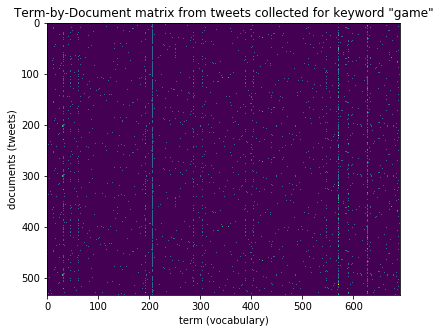

In [495]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(k1_tweets_processed)

# print out the term-by-document matrix
print(k1_termdoc)
# print out the first 5 vocabularies
print(' '.join(k1_vocab[:5]))  # print out only the first 5 vocabs

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

**Instruction 2.10**. Your tasks are:

1. Define a function to compute and return the Euclidean distance between two vectors as we have learned from the class notes. **(5 marks)**

2. Construct function that returns a distance matrix ***euclidean_distance_matrix*** whose element (i,j) stores the Eulidean distance between tweet i-th and i-jth. **You will need this function for subsequent task**. **(5 marks)**

**[Total mark: 10]**

In [512]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

def Euclidean_distance(x,y):
    '''
    Compute and return the Euclidean distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE
    dist = (np.array(x) - np.array(y))*(np.array(x) - np.array(y))
    return np.sqrt(dist.sum())

In [514]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
The function takes the termdoc matrix as the input and compute a variable called "euclidean_distance_matrix", 
which is a matrix whose element (i,j) stores the Eulidean distance between tweet i-th and i-jth.

Hint: you should store the Euclidean distance matrix in a numpy array for easier implementation in subsequent tasks
'''

def compute_euclidean_distance_matrix(termdoc):
    # INSERT YOUR CODE HERE
    np.array(Euclidean_distance)
    j = k1_vocab
    i = k1
compute_euclidean_distance_matrix(k1_termdoc)

NameError: name 'j' is not defined

**Instruction 2.11**. Now you need to compute the distance matrix for **k1_termdoc** and then visualise this distance matrix.

**[Total mark: 10]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the distance matrix for k1_termdoc using the function "compute_euclidean_distance_matrix"
k1_euclidean_distances = # INSERT YOUR CODE HERE

# Visualise the distance matrix for this keyword
# Hint: using imshow() function
# INSERT YOUR CODE HERE



**Instruction 2.12**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
# INSERT YOUR CODE HERE


'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE


'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE


***Instruction 2.13***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 10**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
k2_euclidean_distances = # INSERT YOUR CODE HERE
       
# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE


**Instruction 2.14**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
# INSERT YOUR CODE HERE


'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE


'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE


***Instruction 2.15***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
k3_euclidean_distances = # INSERT YOUR CODE HERE

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE


### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analyse them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [ ]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [ ]:
all_tweets_processed = k1_tweets_processed + k2_tweets_processed + k3_tweets_processed

**Instruction 2.16**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''

all_termdoc, all_vocab = # INSERT YOUR CODE HERE

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE


'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE


**Instruction 2.17**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
all_euclidean_distances = # INSERT YOUR CODE HERE
        
# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE


**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [ ]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=300,
                verbose=True, tol=0.00001, random_state=123456)

**Instruction 2.18**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE


**Instruction 2.19**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE


**Instruction 2.20**. Write your codes to print out the first **500** cluster labels assigned to the first 500 tweets.

[**Total marks: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to print out the first **500** cluster labels assigned to the first 500 tweets.
'''
# INSERT YOUR CODE HERE


**Instruction 2.21**. Next, we would like to obtain the quality of our clustering results. Write your code to obtain the labels of tweets for each keyword and store the labels in three new variables ***k1_labels***, ***k2_labels*** and ***k3_labels***, respectively.

**[Total marks: 5]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

'''
Write your code to obtain the labels of tweets for each keyword
and store the labels of the first keyword in ***k1_labels***, 
the labels of the second keyword in ***k2_labels*** and
the labels of the third keyword in ***k3_labels***.
'''
# INSERT YOUR CODE HERE


**Instruction 2.22**. Then, we examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters). Your tasks are:

1. Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster. **(5 marks)**

2. Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster. **(5 marks)**

**[Total mark: 10]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster.
Hint: you might want to use numpy.where function.
'''
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels
k1_idx_label0 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels
k2_idx_label0 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels
k3_idx_label0 = # INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster.
Hint: you need to plot a bar chart with three bars, 
each bar represents the number of tweets of each keyword that are assigned to the first cluster.
'''
# INSERT YOUR CODE HERE


**Instruction 2.23**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 8**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels
k1_idx_label1 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k2_labels
k2_idx_label1 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k3_labels
k3_idx_label1 = # INSERT YOUR CODE HERE

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE


**Instruction 2.24**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 8**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
k1_idx_label2 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k2_labels
k2_idx_label2 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k3_labels
k3_idx_label2 = # INSERT YOUR CODE HERE

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the third cluster
# INSERT YOUR CODE HERE


### END OF ASSIGNMENT 2 NOTEBOOK

----